# Retail Stock Optimization
**Retail chains often struggle with balancing inventory levels across multiple locations. Overstocking leads to high holding costs and waste, while stockouts result in lost sales and customer dissatisfaction. Traditional rule-based systems are not adaptive to changing demand patterns.**

**To reduce stockouts and overstock situations by predicting product demand and recommending optimal inventory replenishment strategies using machine learning and prescriptive analytics.**

## 1. Data Understanding
### 1.1 Importing Data



In [1]:
import pandas as pd
df = pd.read_csv("hf://datasets/Johnygiya/Walmart_inventory_2024/inventory_data.csv")

c:\Users\youss\RSO-Retail-Stock-Optimization\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df

,store_id,store_name,region,product_id,inventory_level,units_sold,price,last_restock_date
0,S03011,"Mack, Peters and Silva",East,P00378,360.0,227,334.31,2024-12-21
1,S02892,Cummings Group,North,P00232,369.0,211,281.12,2024-11-18
2,S04641,Thompson-Rice,South,P00490,987.0,396,210.19,2024-11-02
3,S04932,Avila PLC,South,P00442,506.0,205,402.45,2024-11-04
4,S02767,Espinoza-Velasquez,South,P00254,376.0,80,122.74,2024-12-06
...,...,...,...,...,...,...,...,...
5095,S01136,"Sharp, Owens and Wilson",West,P00448,974.0,4,450.28,2024-12-02
5096,S04259,Bennett-Rodriguez,West,P00246,121.0,350,473.99,2024-11-06
5097,S03557,Terry Ltd,North,P00375,796.0,496,239.03,2024-12-25
5098,S02546,"Johns, Allen and Huff",West,P00031,401.0,395,415.92,2024-12-15


### 1.2 Data Discovery : 

The provided data represents Walmart stock inventory of the year 2024 and has the following columns : 


**. Store_id:** Unique ID of each store.

**. Store_name:** Name of the store related to Walmart.

**. region:** Region in which the store is located (East, West, North, South)

**. Product_id:** Unique ID of each Product.

**. Inventory_level:** Number of Products in each Store.

**. Units_sold:** Number of units sold for each product in each store.

**. Price:** Unit price of each product.

**. Last_restock_date:** Last date in which the inventory got refilled.
### 1.3 Data Cleaning:

In [3]:
#Checking for missing values:
df.isna().any()

store_id             False
store_name           False
region               False
product_id           False
inventory_level       True
units_sold           False
price                False
last_restock_date    False
dtype: bool

In [4]:
from sklearn.impute import SimpleImputer
# Impute missing values with the mean
imputer = SimpleImputer(strategy='most_frequent')
df["inventory_level"] = imputer.fit_transform(df[["inventory_level"]]).ravel()

In [5]:
df["inventory_level"]

0       360.0
1       369.0
2       987.0
3       506.0
4       376.0
        ...  
5095    974.0
5096    121.0
5097    796.0
5098    401.0
5099    436.0
Name: inventory_level, Length: 5100, dtype: float64

In [6]:

print("Summary Statistics:")
print(df.describe())

Summary Statistics:
       inventory_level   units_sold        price
count      5100.000000  5100.000000  5100.000000
mean        508.527451   248.804510   253.112035
std         289.597982   144.745511   142.160043
min         -10.000000     1.000000     5.240000
25%         250.000000   123.000000   131.327500
50%         506.000000   247.000000   252.025000
75%         763.000000   376.000000   375.300000
max         999.000000   499.000000   499.850000


In [7]:
df.dtypes

store_id              object
store_name            object
region                object
product_id            object
inventory_level      float64
units_sold             int64
price                float64
last_restock_date     object
dtype: object

In [8]:
# Convert the column from float to int
df['inventory_level'] = df['inventory_level'].astype(int)
# Convert the column to datetime
df['last_restock_date'] = pd.to_datetime(df['last_restock_date'])

In [9]:
df

,store_id,store_name,region,product_id,inventory_level,units_sold,price,last_restock_date
0,S03011,"Mack, Peters and Silva",East,P00378,360,227,334.31,2024-12-21
1,S02892,Cummings Group,North,P00232,369,211,281.12,2024-11-18
2,S04641,Thompson-Rice,South,P00490,987,396,210.19,2024-11-02
3,S04932,Avila PLC,South,P00442,506,205,402.45,2024-11-04
4,S02767,Espinoza-Velasquez,South,P00254,376,80,122.74,2024-12-06
...,...,...,...,...,...,...,...,...
5095,S01136,"Sharp, Owens and Wilson",West,P00448,974,4,450.28,2024-12-02
5096,S04259,Bennett-Rodriguez,West,P00246,121,350,473.99,2024-11-06
5097,S03557,Terry Ltd,North,P00375,796,496,239.03,2024-12-25
5098,S02546,"Johns, Allen and Huff",West,P00031,401,395,415.92,2024-12-15


### 1.3 Exploratory Data Analysis: 

C:\Users\youss\AppData\Local\Temp\ipykernel_22140\1074588235.py:13: UserWarning: Legend does not support handles for int instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend(region_units_sold, ['Sum Units Sold'], loc='upper right')


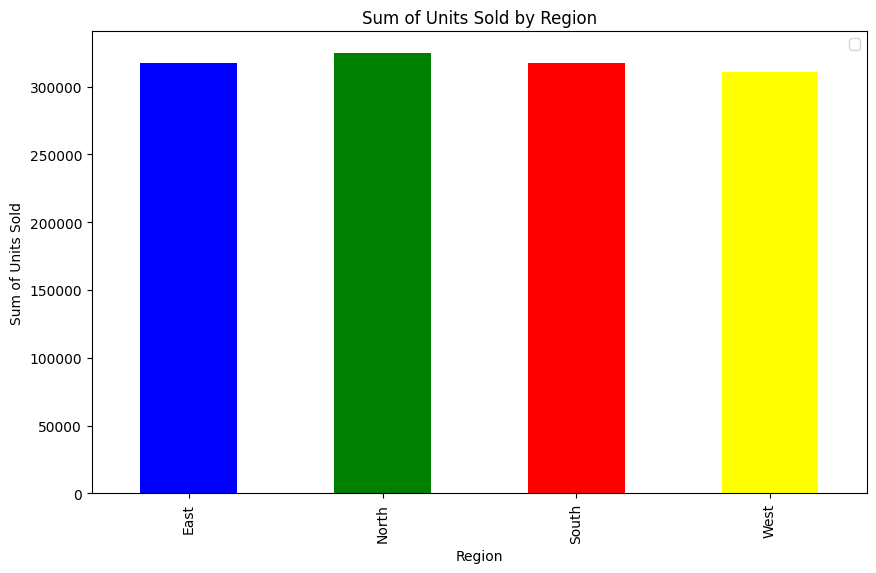

In [10]:

import matplotlib.pyplot as plt
import seaborn as sns

# Group by region and get the sum of units sold
region_units_sold = df.groupby('region')['units_sold'].sum()

# Plot the sum of units sold by region
plt.figure(figsize=(10, 6))
region_units_sold.plot(kind='bar', color=['blue', 'green', 'red', 'yellow'])
plt.title('Sum of Units Sold by Region')
plt.xlabel('Region')
plt.ylabel('Sum of Units Sold')
plt.legend(region_units_sold, ['Sum Units Sold'], loc='upper right')
plt.show()





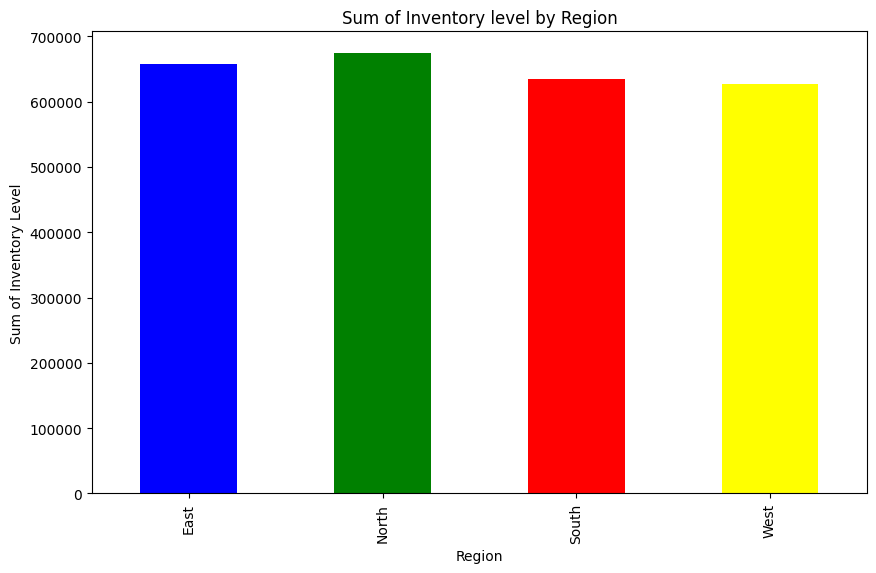

In [17]:

import matplotlib.pyplot as plt
import seaborn as sns

# Group by region and get the sum of units sold
region_units_sold = df.groupby('region')['inventory_level'].sum()

# Plot the sum of units sold by region
plt.figure(figsize=(10, 6))
region_units_sold.plot(kind='bar', color=['blue', 'green', 'red', 'yellow'])
plt.title('Sum of Inventory level by Region')
plt.xlabel('Region')
plt.ylabel('Sum of Inventory Level')
plt.show()

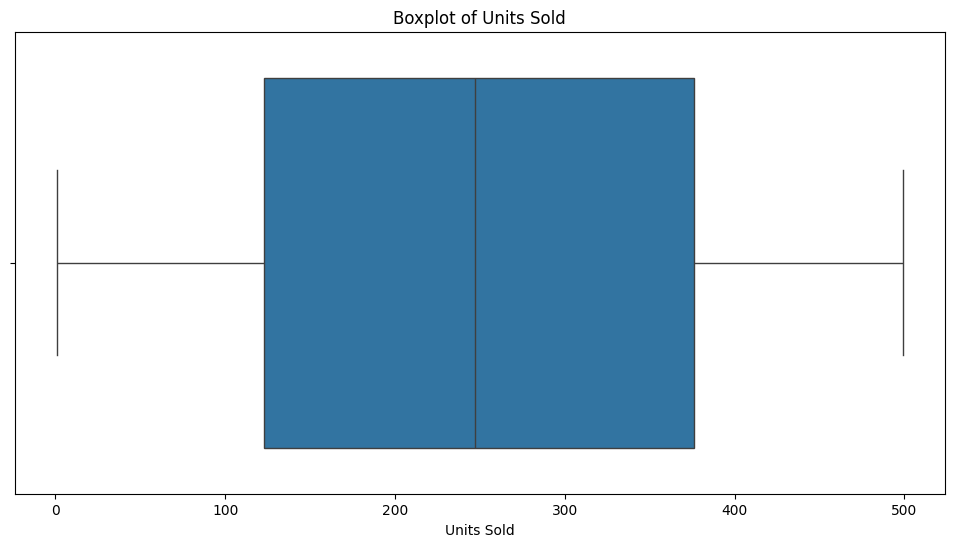

In [12]:
# Boxplot for 'units_sold'
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['units_sold'])
plt.title('Boxplot of Units Sold')
plt.xlabel('Units Sold')
plt.show()

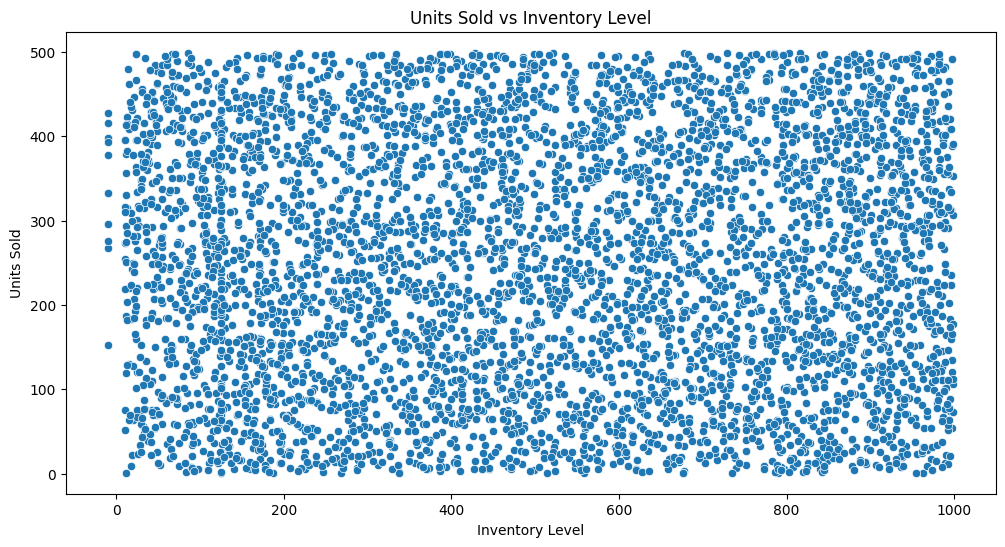

In [21]:
# Scatter plot of 'units_sold' vs 'inventory_level'
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='inventory_level', y='units_sold')
plt.title('Units Sold vs Inventory Level')
plt.xlabel('Inventory Level')
plt.ylabel('Units Sold')
plt.show()


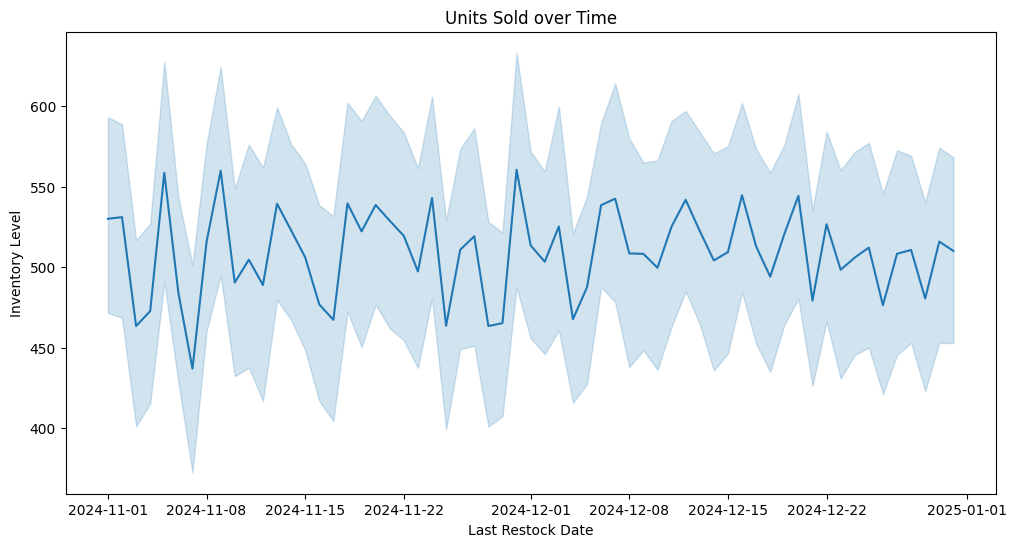

In [19]:
# Plot last restock date with units sold
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='last_restock_date', y='inventory_level')
plt.title('Units Sold over Time')
plt.xlabel('Last Restock Date')
plt.ylabel('Inventory Level')
plt.show()


### 1.3 Data Prepocessing:

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(df[["price"]])

# Output the scaled data
print("Scaled Data:\n", scaled_data)

Scaled Data:
 [[ 0.57122891]
 [ 0.19703646]
 [-0.30195717]
 ...
 [-0.09906733]
 [ 1.14535649]
 [ 0.0106789 ]]


### 2. Prediction